In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

results = pd.read_csv("results.csv")

             train_losses  val_losses  train_accs  val_accs  f1_scores  \
train_index                                                              
0                0.143146    0.738989    0.960784  0.769231   0.769231   
1                0.659662    0.687747    0.588235  0.461538   0.588235   
2                0.654109    0.712431    0.607843  0.461538   0.363636   
3                0.659206    0.720975    0.529412  0.538462   0.500000   
4                0.327154    0.839164    0.923077  0.500000   0.500000   

             precision_scores  recall_scores  roc_auc_scores  
train_index                                                   
0                    0.833333       0.714286        0.773810  
1                    0.500000       0.714286        0.440476  
2                    0.400000       0.333333        0.452381  
3                    0.500000       0.500000        0.535714  
4                    0.500000       0.500000        0.500000  


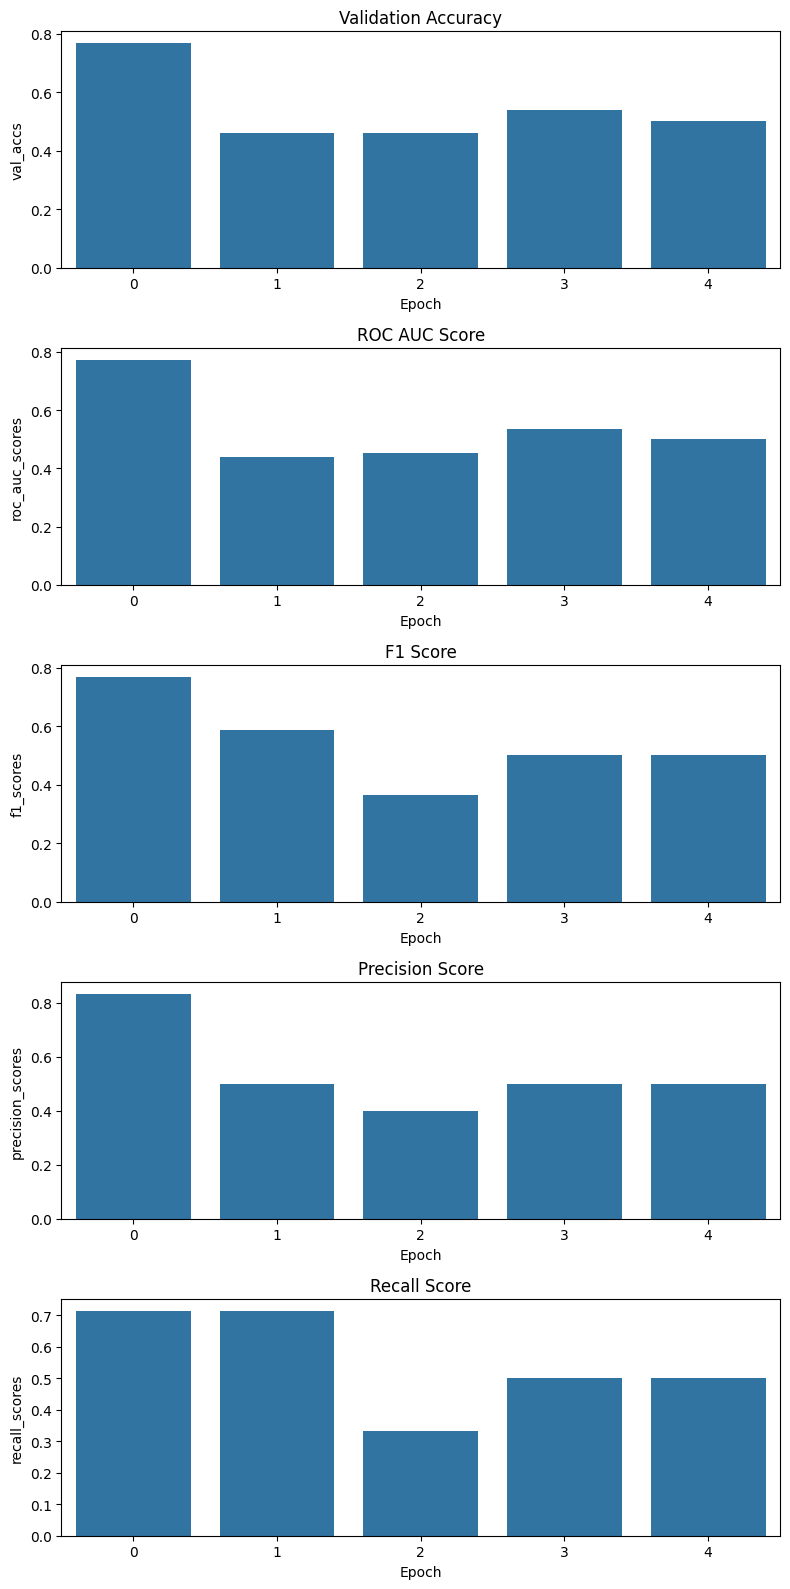

In [22]:
# group by train_index and get the last row
last = results.groupby("train_index").last()
print(last)

# plot the last row of the metrics for each train_index
fig, ax = plt.subplots(5, 1, figsize=(8, 16))
sns.barplot(x="train_index", y="val_accs", data=last.reset_index(), ax=ax[0])
sns.barplot(x="train_index", y="roc_auc_scores", data=last.reset_index(), ax=ax[1])
sns.barplot(x="train_index", y="f1_scores", data=last.reset_index(), ax=ax[2])
sns.barplot(x="train_index", y="precision_scores", data=last.reset_index(), ax=ax[3])
sns.barplot(x="train_index", y="recall_scores", data=last.reset_index(), ax=ax[4])
# use the same x axis
ax[0].set_xlabel("Epoch")
ax[1].set_xlabel("Epoch")
ax[2].set_xlabel("Epoch")
ax[3].set_xlabel("Epoch")
ax[4].set_xlabel("Epoch")

# set the title of the barplots
ax[0].set_title("Validation Accuracy")
ax[1].set_title("ROC AUC Score")
ax[2].set_title("F1 Score")
ax[3].set_title("Precision Score")
ax[4].set_title("Recall Score")


plt.tight_layout()

plt.savefig("results.png")

# convert last to latex
last.to_latex("last.tex")


In [21]:
# compute the mean and std of the metrics for each train_index
mean = last.mean()
std = last.std()
print(mean)
print(std)

# put the mean and std into a table
table = pd.DataFrame({"mean": mean, "std": std})
# save to latex
table.to_latex("results.tex")





Fold
train_losses        0.488655
val_losses          0.739861
train_accs          0.721870
val_accs            0.546154
f1_scores           0.544220
precision_scores    0.546667
recall_scores       0.552381
roc_auc_scores      0.540476
dtype: float64
Fold
train_losses        0.240399
val_losses          0.058495
train_accs          0.203387
val_accs            0.128717
f1_scores           0.149238
precision_scores    0.165999
recall_scores       0.162708
roc_auc_scores      0.135892
dtype: float64
